## Problem understanding:

In [1]:
#installing and upgrading of the tensorflow

!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\91770\anaconda3\lib\site-packages (2.6.0)


In [2]:
pip install spacy

In [3]:
# importing the required libraries

import pandas as pd
import numpy as np
import string # for special operations on string
import spacy # for languages
import nltk
from nltk.corpus import stopwords

In [4]:
from matplotlib.pyplot import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline


In [5]:
#loading the affinity lexicons

afinn= pd.read_csv(r"C:\Users\91770\Downloads\archive (2)\Afinn.csv",encoding='cp1252')

In [6]:
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [7]:
#uploading the dataset

book = pd.read_csv("C:\\Users\\91770\\OneDrive\\Desktop\\camera review.txt", error_bad_lines=False)

In [8]:
book

,x
0,Had ordered the GoPro Hero 8 Holiday bundle so...
1,"Material is very good, newly bought. Due to pa..."
2,A nice strong and sleek one from Amazon Basics...
3,It's awesome product with each partition nicel...
4,The product quality is excellent and it’s real...
5,"This is a basic case, but it does the job well..."
6,The die cut cavity for the equipment is too lo...
7,"I don't like the texture of the box, it is not..."
8,This product is not worth it’s value.. Just wo...
9,I was a bit taken aback seeing the product. It...


In [9]:
book=[i.strip() for i in book.x]
# removing the white spaces


In [10]:
#removing the empty reviews if any...

book =[x for x in book if x]

In [11]:
book

["Had ordered the GoPro Hero 8 Holiday bundle so wanted a case for all the accessories. Went with the small size. It's perfect for all the accessories you get in the holiday bundle plus a few more stuff. \r\nIf you're not planning to get a vlogging case or any other bulkier mods then small size is perfect. Check the pictures for size representation",
 'Material is very good, newly bought. Due to pandemic, I have not gone out in rain, so water resistant quality not checked, hence cannot say.\r\nThe case can accommodate GoPro Hero 8 Black with vlogging Mod (I bought Yantralaya), battery charger with two batteries plus one extra, total three, and one/two extra items, see picture.\r\nWill fit in small Tankbag/sidebag easily.\r\nTop mesh bag can store cables, memoir cards, silica zel packets etc.\r\nIf you are a vblogger or using any charging Mod, then you have to keep the original GoPro hero 8 Black battery cover in some safe place, which is mesh pocket in this box.\r\nSturdiness of the bo

In [12]:
#joining all the reviews to form a single string..

text= ' '.join(book)

In [13]:
import re
token= re.sub("[^A-Za-z" "]+"," ",text).lower()
token= re.sub("[0-9""]+"," ", token)
token

'had ordered the gopro hero holiday bundle so wanted a case for all the accessories went with the small size it s perfect for all the accessories you get in the holiday bundle plus a few more stuff if you re not planning to get a vlogging case or any other bulkier mods then small size is perfect check the pictures for size representation material is very good newly bought due to pandemic i have not gone out in rain so water resistant quality not checked hence cannot say the case can accommodate gopro hero black with vlogging mod i bought yantralaya battery charger with two batteries plus one extra total three and one two extra items see picture will fit in small tankbag sidebag easily top mesh bag can store cables memoir cards silica zel packets etc if you are a vblogger or using any charging mod then you have to keep the original gopro hero black battery cover in some safe place which is mesh pocket in this box sturdiness of the box is quite good does not bend easily a nice strong and

In [14]:
# import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91770\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
token1= token
token1= token1.split(" ")

In [16]:
token1

['had',
 'ordered',
 'the',
 'gopro',
 'hero',
 'holiday',
 'bundle',
 'so',
 'wanted',
 'a',
 'case',
 'for',
 'all',
 'the',
 'accessories',
 'went',
 'with',
 'the',
 'small',
 'size',
 'it',
 's',
 'perfect',
 'for',
 'all',
 'the',
 'accessories',
 'you',
 'get',
 'in',
 'the',
 'holiday',
 'bundle',
 'plus',
 'a',
 'few',
 'more',
 'stuff',
 'if',
 'you',
 're',
 'not',
 'planning',
 'to',
 'get',
 'a',
 'vlogging',
 'case',
 'or',
 'any',
 'other',
 'bulkier',
 'mods',
 'then',
 'small',
 'size',
 'is',
 'perfect',
 'check',
 'the',
 'pictures',
 'for',
 'size',
 'representation',
 'material',
 'is',
 'very',
 'good',
 'newly',
 'bought',
 'due',
 'to',
 'pandemic',
 'i',
 'have',
 'not',
 'gone',
 'out',
 'in',
 'rain',
 'so',
 'water',
 'resistant',
 'quality',
 'not',
 'checked',
 'hence',
 'cannot',
 'say',
 'the',
 'case',
 'can',
 'accommodate',
 'gopro',
 'hero',
 'black',
 'with',
 'vlogging',
 'mod',
 'i',
 'bought',
 'yantralaya',
 'battery',
 'charger',
 'with',
 'two

## Removing the stop words:

In [17]:
## using list comprehension;

token1 = [ w for w in token1 if w not in stop_words]
token1

['ordered',
 'gopro',
 'hero',
 'holiday',
 'bundle',
 'wanted',
 'case',
 'accessories',
 'went',
 'small',
 'size',
 'perfect',
 'accessories',
 'get',
 'holiday',
 'bundle',
 'plus',
 'stuff',
 'planning',
 'get',
 'vlogging',
 'case',
 'bulkier',
 'mods',
 'small',
 'size',
 'perfect',
 'check',
 'pictures',
 'size',
 'representation',
 'material',
 'good',
 'newly',
 'bought',
 'due',
 'pandemic',
 'gone',
 'rain',
 'water',
 'resistant',
 'quality',
 'checked',
 'hence',
 'cannot',
 'say',
 'case',
 'accommodate',
 'gopro',
 'hero',
 'black',
 'vlogging',
 'mod',
 'bought',
 'yantralaya',
 'battery',
 'charger',
 'two',
 'batteries',
 'plus',
 'one',
 'extra',
 'total',
 'three',
 'one',
 'two',
 'extra',
 'items',
 'see',
 'picture',
 'fit',
 'small',
 'tankbag',
 'sidebag',
 'easily',
 'top',
 'mesh',
 'bag',
 'store',
 'cables',
 'memoir',
 'cards',
 'silica',
 'zel',
 'packets',
 'etc',
 'vblogger',
 'using',
 'charging',
 'mod',
 'keep',
 'original',
 'gopro',
 'hero',
 'bla

In [18]:
from wordcloud import WordCloud

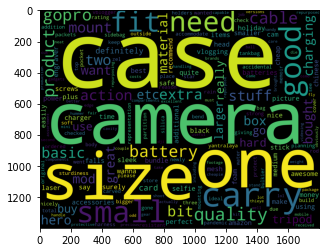

In [19]:
token1= " ".join(token1)

image = WordCloud(background_color= "black",
    width= 1800,
    height= 1400).generate(token1)

plt.imshow(image)

In [20]:
token1= token1.split(" ")

In [21]:
token1

['ordered',
 'gopro',
 'hero',
 'holiday',
 'bundle',
 'wanted',
 'case',
 'accessories',
 'went',
 'small',
 'size',
 'perfect',
 'accessories',
 'get',
 'holiday',
 'bundle',
 'plus',
 'stuff',
 'planning',
 'get',
 'vlogging',
 'case',
 'bulkier',
 'mods',
 'small',
 'size',
 'perfect',
 'check',
 'pictures',
 'size',
 'representation',
 'material',
 'good',
 'newly',
 'bought',
 'due',
 'pandemic',
 'gone',
 'rain',
 'water',
 'resistant',
 'quality',
 'checked',
 'hence',
 'cannot',
 'say',
 'case',
 'accommodate',
 'gopro',
 'hero',
 'black',
 'vlogging',
 'mod',
 'bought',
 'yantralaya',
 'battery',
 'charger',
 'two',
 'batteries',
 'plus',
 'one',
 'extra',
 'total',
 'three',
 'one',
 'two',
 'extra',
 'items',
 'see',
 'picture',
 'fit',
 'small',
 'tankbag',
 'sidebag',
 'easily',
 'top',
 'mesh',
 'bag',
 'store',
 'cables',
 'memoir',
 'cards',
 'silica',
 'zel',
 'packets',
 'etc',
 'vblogger',
 'using',
 'charging',
 'mod',
 'keep',
 'original',
 'gopro',
 'hero',
 'bla

In [22]:
stpwrd= ["camera","case","small","size","one","carry","gopro","product"]
updated_stpwrd = stop_words+stpwrd

In [23]:
token2= [ w for w in token1 if w not in updated_stpwrd]

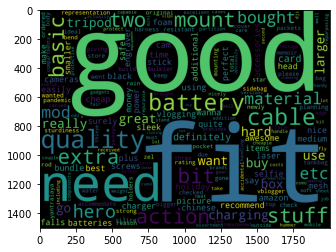

In [24]:
token2 = " ".join(token2)

updated_wordcloud = WordCloud(
    background_color = "black",
    width=2000,
    height= 1500).generate(token2)

plt.imshow(updated_wordcloud)

In [25]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91770\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#importing the tokenizer from nltk library

from nltk import tokenize

In [27]:
token_data = tokenize.sent_tokenize(text)

In [28]:
token_data

['Had ordered the GoPro Hero 8 Holiday bundle so wanted a case for all the accessories.',
 'Went with the small size.',
 "It's perfect for all the accessories you get in the holiday bundle plus a few more stuff.",
 "If you're not planning to get a vlogging case or any other bulkier mods then small size is perfect.",
 'Check the pictures for size representation Material is very good, newly bought.',
 'Due to pandemic, I have not gone out in rain, so water resistant quality not checked, hence cannot say.',
 'The case can accommodate GoPro Hero 8 Black with vlogging Mod (I bought Yantralaya), battery charger with two batteries plus one extra, total three, and one/two extra items, see picture.',
 'Will fit in small Tankbag/sidebag easily.',
 'Top mesh bag can store cables, memoir cards, silica zel packets etc.',
 'If you are a vblogger or using any charging Mod, then you have to keep the original GoPro hero 8 Black battery cover in some safe place, which is mesh pocket in this box.',
 'Stu

In [29]:
# forming a dataframe from the tokenized data

dataframe= pd.DataFrame(token_data, columns=['sentences'])

In [30]:
dataframe

,sentences
0,Had ordered the GoPro Hero 8 Holiday bundle so...
1,Went with the small size.
2,It's perfect for all the accessories you get i...
3,If you're not planning to get a vlogging case ...
4,Check the pictures for size representation Mat...
5,"Due to pandemic, I have not gone out in rain, ..."
6,The case can accommodate GoPro Hero 8 Black wi...
7,Will fit in small Tankbag/sidebag easily.
8,"Top mesh bag can store cables, memoir cards, s..."
9,If you are a vblogger or using any charging Mo...


In [31]:
# converting the affinity_lexicons into a dictionary...

affinity_score= afinn.set_index('word')['value'].to_dict()

In [32]:
affinity_score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [33]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [34]:
import en_core_web_sm
nlp = en_core_web_sm.load()


In [35]:
sentiment_lexicons = affinity_score

In [36]:
# defining a function to find the sentiment in the text Reviews...

def sentiment_analysis(text: str = None):
    sent_score=0
    if text:
        sentence= nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicons.get(word.lemma_,0)
            
    return sent_score

In [37]:
#assigning the lexicon value to the text data to find the sentiment...

dataframe['sentence_value']= dataframe['sentences'].apply(sentiment_analysis)

In [38]:
dataframe

,sentences,sentence_value
0,Had ordered the GoPro Hero 8 Holiday bundle so...,1
1,Went with the small size.,0
2,It's perfect for all the accessories you get i...,3
3,If you're not planning to get a vlogging case ...,3
4,Check the pictures for size representation Mat...,3
5,"Due to pandemic, I have not gone out in rain, ...",0
6,The case can accommodate GoPro Hero 8 Black wi...,0
7,Will fit in small Tankbag/sidebag easily.,1
8,"Top mesh bag can store cables, memoir cards, s...",2
9,If you are a vblogger or using any charging Mo...,3


In [39]:
#splitiing the data to find the word count..

dataframe['word count']= dataframe['sentences'].str.split().apply(len)


In [40]:
dataframe.sort_values(by='sentence_value')

,sentences,sentence_value,word count
35,The die cut cavity for the equipment is too lo...,-7,10
44,i do not need to worry at all when it falls fr...,-3,14
17,"It's very hard from outside ,so it will protec...",-2,14
40,"For my use, it was almost waste of money.",-1,9
29,"This is a basic case, but it does the job well...",-1,25
5,"Due to pandemic, I have not gone out in rain, ...",0,19
26,You can actually get this case or their smalle...,0,17
31,"In the case with two cameras, I have additiona...",0,14
34,"As it is, this is a very handy case for small ...",0,13
23,I brought it for Thieye T5 edge.,0,7


In [52]:
negative_words=dataframe[dataframe['sentence_value']<=0].head(10)
negative_words

,sentences,sentence_value,word count,index
1,Went with the small size.,0,5,1
5,"Due to pandemic, I have not gone out in rain, ...",0,19,5
6,The case can accommodate GoPro Hero 8 Black wi...,0,30,6
13,The only reason I am giving it a 4 and not 5 s...,0,19,13
17,"It's very hard from outside ,so it will protec...",-2,14,17
18,"In addition to this , it's having soft compart...",0,12,18
20,So must buy.,0,3,20
21,It's not just for GoPro action cam.,0,7,21
22,You can buy it for other brands too.,0,8,22
23,I brought it for Thieye T5 edge.,0,7,23


In [55]:
positive_words=dataframe[dataframe['sentence_value']>0].head()
positive_words

,sentences,sentence_value,word count,index
0,Had ordered the GoPro Hero 8 Holiday bundle so...,1,16,0
2,It's perfect for all the accessories you get i...,3,17,2
3,If you're not planning to get a vlogging case ...,3,19,3
4,Check the pictures for size representation Mat...,3,12,4
7,Will fit in small Tankbag/sidebag easily.,1,6,7


C:\Users\91770\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentence_value', ylabel='Density'>

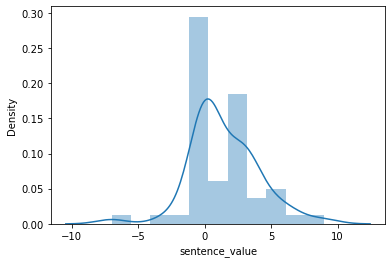

In [43]:
#distplot visualization using seaborn library

import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(dataframe['sentence_value'])

In [44]:
dataframe['index']= dataframe.index


<AxesSubplot:xlabel='index', ylabel='sentence_value'>

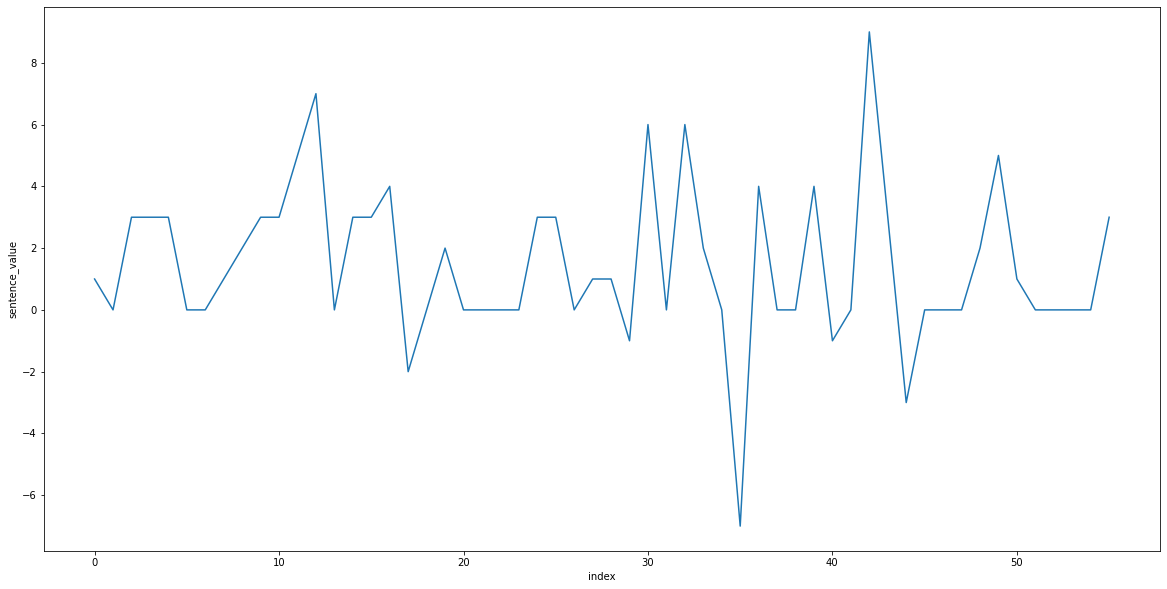

In [45]:
#lineplot visualisation using the seaborn library..

plt.figure(figsize=(20,10))
sns.lineplot(y='sentence_value', x='index', data= dataframe)

<AxesSubplot:title={'center':'sentiment analysis of the camera review data'}, xlabel='word count', ylabel='sentence_value'>

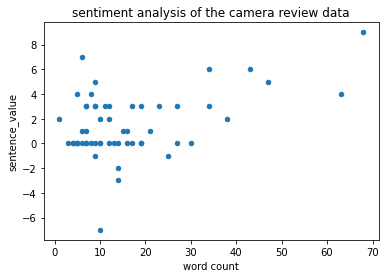

In [46]:
#scatterplot visualization....

dataframe.plot.scatter(x='word count', y='sentence_value', title='sentiment analysis of the camera review data')

# Emotion mining using Text2emotion library


In [47]:
pip install text2emotion


Note: you may need to restart the kernel to use updated packages.


In [48]:
import text2emotion as et

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91770\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91770\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91770\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [49]:
results=et.get_emotion(text)

<BarContainer object of 5 artists>

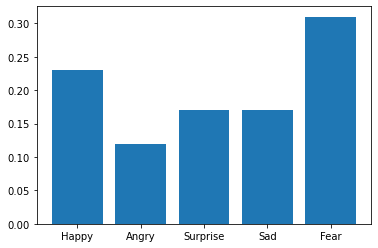

In [50]:
a_dictionary = {'Happy': 0.23, 'Angry': 0.12, 'Surprise': 0.17, 'Sad': 0.17, 'Fear': 0.31}
keys = a_dictionary. keys()
values = a_dictionary. values()
plt. bar(keys, values)

* Here the visualization shows the emotion of the customer who took the go-pro camera from amazon.in
* the fear is the major emotion in the reviews because the action camera often taken for adventurous activities